In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import locally_linear_embedding as LLE
from sklearn.preprocessing import normalize
from MNE_Pipeline import MNE_Repo_Mat as MP

In [2]:
subject = MP.construct_subject()

0 files missing from /home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/datasets/_fsaverage/root.txt in /home/kam/mne_data/MNE-fsaverage-data
0 files missing from /home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/datasets/_fsaverage/bem.txt in /home/kam/mne_data/MNE-fsaverage-data/fsaverage


In [76]:
labels = mne.read_labels_from_annot(subject)[0:68]
labels_lh = [lbl for lbl in labels if lbl.hemi == 'lh']
labels_rh = [lbl for lbl in labels if lbl.hemi == 'rh']

pos = labels[0].pos.astype(np.float32)
pos_lh = labels_lh[0].pos.astype(np.float32)
pos_rh = labels_rh[0].pos.astype(np.float32)

colors = np.full(len(pos), 1)
colors_lh = np.full(len(pos_lh), 1)
colors_rh = np.full(len(pos_rh), 1)

for i,lbl in enumerate(labels_rh[1:34]):
    pos_rh = np.append(pos_rh, lbl.pos.astype(np.float32), axis=0)
    c = np.full(len(lbl.pos), i+1)
    colors_rh = np.append(colors_rh, c)

for i,lbl in enumerate(labels_lh[1:34]):
    pos_lh = np.append(pos_lh, lbl.pos.astype(np.float32), axis=0)
    c = np.full(len(lbl.pos), i+1)
    colors_lh = np.append(colors_lh, c)
    
for i,lbl in enumerate(labels[1:68]):
    pos = np.append(pos, lbl.pos.astype(np.float32), axis=0)
    c = np.full(len(lbl.pos), i+1)
    colors = np.append(colors, c)

Reading labels from parcellation...
   read 35 labels from /home/kam/mne_data/MNE-fsaverage-data/fsaverage/label/lh.aparc.annot
   read 34 labels from /home/kam/mne_data/MNE-fsaverage-data/fsaverage/label/rh.aparc.annot


In [79]:
sum = 0
for lbl in labels:
    sum = sum + len(lbl.pos)
colors.shape

(299879,)

In [36]:
def get_centers_of_rois_xy(lle, labels):
    start = 0
    end = 0
    centers = []
    for lbl in labels:
        n_vertices = len(lbl.pos)
        end = end + n_vertices
        x = lle[start:end,0].mean()
        y = lle[start:end,1].mean()
        centers.append((x,y))
        start = end
    return np.array(centers) * 1000

In [32]:
def plot_2d_roi_map(lle, colors, centers, name):
    plt.figure()
    plt.scatter(lle[:,0]*1000, lle[:,1]*1000, c=colors, cmap=plt.cm.Spectral)
    
    for i,center in enumerate(centers):
        plt.annotate(i+1, (center[0],center[1]))
        
    plt.savefig('68_roi_maps/' + name + '.png')

## Hessian LLE

In [38]:
lle_rh = LLE(pos_rh, n_neighbors=10, n_components=2, method='hessian')
lle_lh = LLE(pos_lh, n_neighbors=10, n_components=2, method='hessian')

In [39]:
centers_rh = get_centers_of_rois_xy(lle_rh[0], labels_rh)
centers_lh = get_centers_of_rois_xy(lle_lh[0], labels_lh)

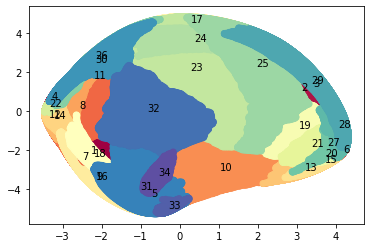

In [41]:
plot_2d_roi_map(lle_rh[0], colors_rh, centers_rh, 'hessian_lle_rh_neighbors_10')

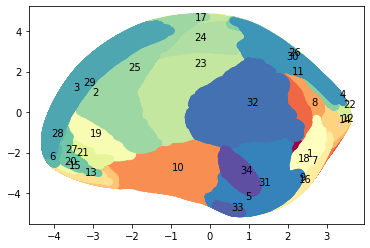

In [42]:
plot_2d_roi_map(lle_lh[0], colors_lh, centers_lh, 'hessian_lle_lh_neighbors_10')

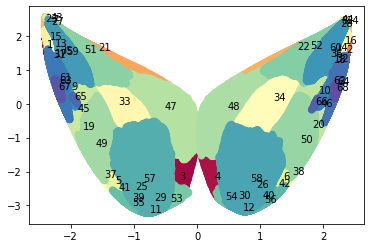

In [80]:
lle_w = LLE(pos, n_neighbors=40, n_components=2, method='hessian')
centers = get_centers_of_rois_xy(lle_w[0], labels)
plot_2d_roi_map(lle_w[0], colors, centers, 'hessian_lle_both_neighbors_40')

In [82]:
lle_w = LLE(pos, n_neighbors=68, n_components=2, method='hessian')
centers = get_centers_of_rois_xy(lle_w[0], labels)
plot_2d_roi_map(lle_w[0], colors, centers, 'hessian_lle_both_neighbors_68')

MemoryError: 

## Modified LLE

In [48]:
lle_rh = LLE(pos_rh, n_neighbors=5, n_components=2, method='modified')
lle_lh = LLE(pos_lh, n_neighbors=5, n_components=2, method='modified')

In [49]:
centers_rh = get_centers_of_rois_xy(lle_rh[0], labels_rh)
centers_lh = get_centers_of_rois_xy(lle_lh[0], labels_lh)

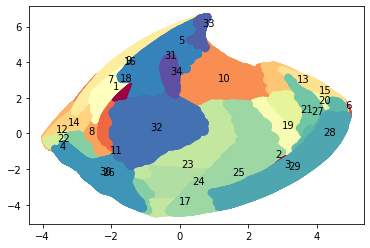

In [50]:
plot_2d_roi_map(lle_rh[0], colors_rh, centers_rh, 'modified_lle_rh_neighbors_5')

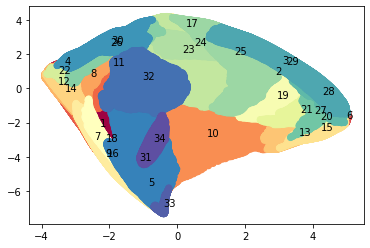

In [51]:
plot_2d_roi_map(lle_lh[0], colors_lh, centers_lh, 'modified_lle_lh_neighbors_5')

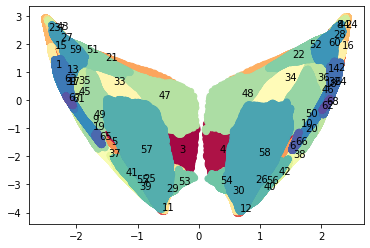

In [81]:
lle_w = LLE(pos, n_neighbors=40, n_components=2, method='modified')
centers = get_centers_of_rois_xy(lle_w[0], labels)
plot_2d_roi_map(lle_w[0], colors, centers, 'modified_lle_both_neighbors_40')

In [ ]:
lle_w = LLE(pos, n_neighbors=68, n_components=2, method='modified')
centers = get_centers_of_rois_xy(lle_w[0], labels)
plot_2d_roi_map(lle_w[0], colors, centers, 'modified_lle_both_neighbors_68')